In [1]:
import pandas as pd


In [2]:
df=pd.read_csv("/content/drive/MyDrive/NLP_SOFT/twitter_validation_(1).csv")

In [3]:
df.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [ ]:
df_col=["ID","Location","Target","Text"]

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/NLP_SOFT/twitter_validation_(1).csv",names=df_col)

In [ ]:
df.head()

,ID,Location,Target,Text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [ ]:
df.isnull().sum()

ID          0
Location    0
Target      0
Text        0
dtype: int64

In [ ]:
df["Target"].value_counts()

Target
Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: count, dtype: int64

In [ ]:
df.drop(df.index[(df["Target"]=="Irrelevant")],axis=0,inplace=True)
df["Target"].value_counts()

Target
Neutral     285
Positive    277
Negative    266
Name: count, dtype: int64

In [ ]:
df

,ID,Location,Target,Text
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
5,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
993,314,Amazon,Negative,Please explain how this is possible! How can t...
994,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
df

,ID,Location,Target,Text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
823,314,Amazon,Negative,Please explain how this is possible! How can t...
824,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
825,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
826,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df.drop(["ID","Location"],axis=1,inplace=True)
df

,Target,Text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so it’s time to drink wine n play...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df["Target"]=df["Target"].map({"Positive":1,"Negative":-1,"Neutral":0})
df

,Target,Text
0,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1,@Microsoft Why do I pay for WORD when it funct...
2,-1,"CSGO matchmaking is so full of closet hacking,..."
3,0,Now the President is slapping Americans in the...
4,-1,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
823,-1,Please explain how this is possible! How can t...
824,1,Good on Sony. As much as I want to see the new...
825,1,Today sucked so it’s time to drink wine n play...
826,1,Bought a fraction of Microsoft today. Small wins.


In [ ]:
tweets=df.Text
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp I’ve had Madeleine McCann in my cel...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so it’s time to drink wine n play...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: Text, Length: 828, dtype: object

In [ ]:
tweets=tweets.str.replace(r"[^a-zA-Z0-9]"," ")
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp I’ve had Madeleine McCann in my cel...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so it’s time to drink wine n play...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: Text, Length: 828, dtype: object

In [ ]:
tweets=tweets.str.replace(r"[^a-zA-Z0-9]"," ",regex=True)
tweets

0      BBC News   Amazon boss Jeff Bezos rejects clai...
1       Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi  EAHelp I ve had Madeleine McCann in my cel...
                             ...                        
823    Please explain how this is possible  How can t...
824    Good on Sony  As much as I want to see the new...
825    Today sucked so it s time to drink wine n play...
826    Bought a fraction of Microsoft today  Small wins 
827    Johnson   Johnson to stop selling talc baby po...
Name: Text, Length: 828, dtype: object

In [ ]:
from nltk.stem import SnowballStemmer
from nltk import TweetTokenizer

stemmer=SnowballStemmer("english")
tk=TweetTokenizer()

In [ ]:
tweets=tweets.apply(lambda x:[stemmer.stem(i.lower())for i in tk.tokenize(x)]).apply(lambda y:" ".join(y))

In [ ]:
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi do i pay for word when it functi...
2      csgo matchmak is so full of closet hack it s a...
3      now the presid is slap american in the face th...
4      hi eahelp i ve had madelein mccann in my cella...
                             ...                        
823    pleas explain how this is possibl how can they...
824    good on soni as much as i want to see the new ...
825    today suck so it s time to drink wine n play b...
826       bought a fraction of microsoft today small win
827    johnson johnson to stop sell talc babi powder ...
Name: Text, Length: 828, dtype: object

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
sw=set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
tweets==tweets.apply(lambda x:[i for i in tk.tokenize(x)if i not in sw]).apply(lambda x:" ".join(x))
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi do i pay for word when it functi...
2      csgo matchmak is so full of closet hack it s a...
3      now the presid is slap american in the face th...
4      hi eahelp i ve had madelein mccann in my cella...
                             ...                        
823    pleas explain how this is possibl how can they...
824    good on soni as much as i want to see the new ...
825    today suck so it s time to drink wine n play b...
826       bought a fraction of microsoft today small win
827    johnson johnson to stop sell talc babi powder ...
Name: Text, Length: 828, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
train_vec=vectorizer.fit_transform(tweets)
print(train_vec)

  (0, 756)	0.2456282916977699
  (0, 539)	0.2456282916977699
  (0, 3691)	0.19717097284763976
  (0, 903)	0.11802111433875656
  (0, 1081)	0.2456282916977699
  (0, 1216)	0.22139963227270484
  (0, 2140)	0.12503547156807654
  (0, 348)	0.2135997461023189
  (0, 932)	0.16343698819954885
  (0, 877)	0.2018385048310212
  (0, 2949)	0.2456282916977699
  (0, 628)	0.2456282916977699
  (0, 1967)	0.23145543449136263
  (0, 695)	0.2135997461023189
  (0, 424)	0.14270670271218175
  (0, 2448)	0.365996231282465
  (0, 594)	0.46291086898272527
  (1, 867)	0.3645428575230946
  (1, 3086)	0.3645428575230946
  (1, 2406)	0.15389960631027816
  (1, 2548)	0.14798852981344893
  (1, 2741)	0.3435085791442518
  (1, 3290)	0.17382772521979512
  (1, 1504)	0.3645428575230946
  (1, 1943)	0.12830177949831875
  :	:
  (825, 1943)	0.10945584707082745
  (826, 1478)	0.49988617345624353
  (826, 3270)	0.47104252801588
  (826, 699)	0.4107681453904146
  (826, 3896)	0.34764789597087525
  (826, 3603)	0.33973561765433324
  (826, 2529)	0.1778

In [ ]:
train_vec.shape

(828, 4042)

In [ ]:
x=train_vec
y=df["Target"].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
svm_model=SVC()
nm_model=MultinomialNB()
rf_model= RandomForestClassifier()
ab_model=AdaBoostClassifier()

lst_model=[svm_model,nm_model,rf_model,ab_model]


In [ ]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay


In [ ]:
print(y_train.shape)
print(y_test.shape)

(579,)
(249,)


SVC()
****************************************************************************************************
              precision    recall  f1-score   support

          -1       0.54      0.53      0.54        75
           0       0.56      0.74      0.64        84
           1       0.68      0.49      0.57        90

    accuracy                           0.59       249
   macro avg       0.59      0.59      0.58       249
weighted avg       0.60      0.59      0.58       249

****************************************************************************************************
MultinomialNB()
****************************************************************************************************
              precision    recall  f1-score   support

          -1       0.51      0.76      0.61        75
           0       0.66      0.51      0.58        84
           1       0.69      0.56      0.62        90

    accuracy                           0.60       249
   macro avg       0.6

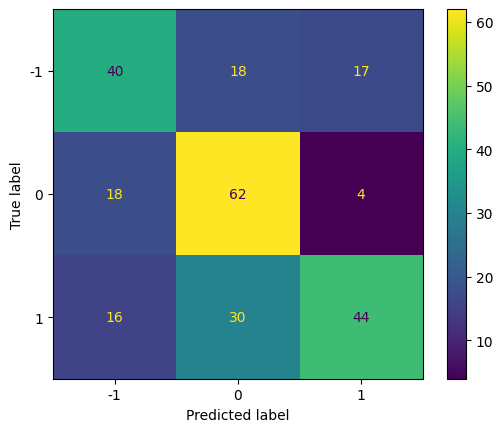

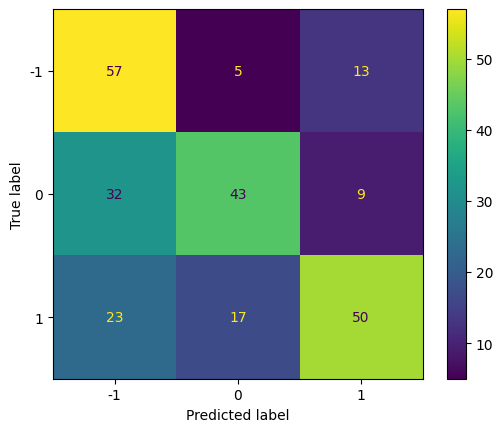

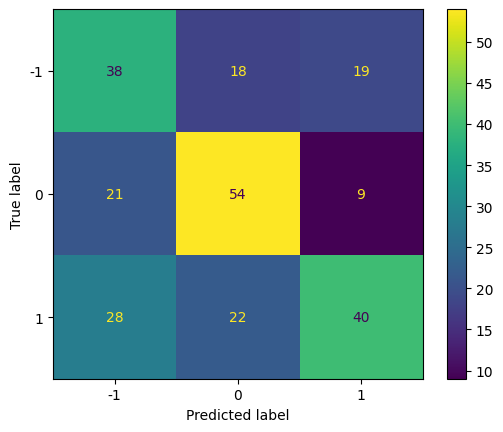

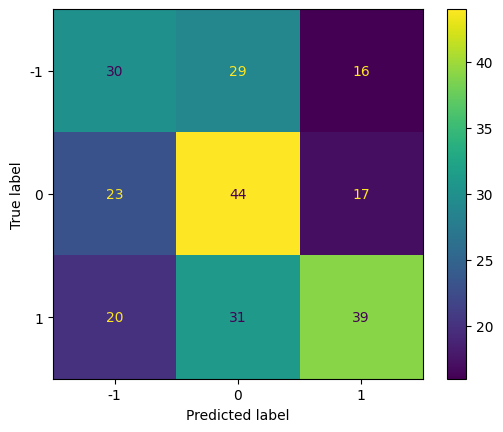

In [ ]:
for i in lst_model:
  print(i)
  i.fit(x_train,y_train)
  y_predict=i.predict(x_test)
  print("*"*100)
  print(classification_report(y_test,y_predict))
  print("*"*100)
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_predict))